Credit Card Fraud Detection - Using machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
#load credit card dataset
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

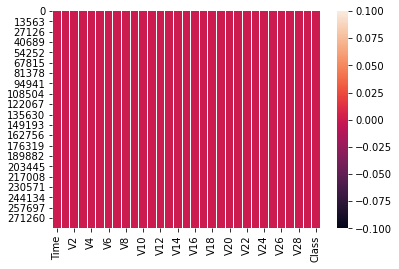

In [5]:
#visualize null values
sns.heatmap(df.isnull())
plt.show()

In [6]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.shape

(284807, 31)

In [8]:
#here there is no null values or no categorical variables
#Now using classification algorithm 

In [9]:
#separate input and output variable
X=df.drop('Class',axis=1)#input variable
Y=df['Class']#target variable

In [10]:
columns=X.columns
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [11]:
#Scaling
#Use standard scaler
#create object of class StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [12]:
c=df['Class'].value_counts()
c

0    284315
1       492
Name: Class, dtype: int64

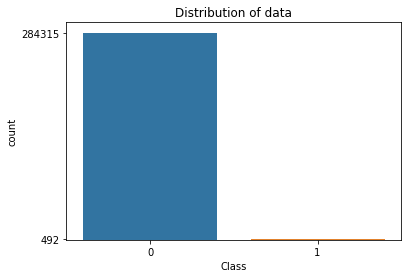

In [109]:
#visualize dataset
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Class')
plt.yticks(c)
plt.title('Distribution of data')
plt.show()

In [14]:
#split data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [15]:
pd.Series(y_train).value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [16]:
pd.Series(y_test).value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [17]:
#here both training and testing dataset is imbalance
#so there are 2 methods to balance data
#1.RandomUnderSampler 2. RandomOverSampler
#here use RandomOverSampler
#create object of class RandomOverSampler
ros=RandomOverSampler()
x_train1,y_train1=ros.fit_resample(x_train,y_train)
x_test1,y_test1=ros.fit_resample(x_test,y_test)

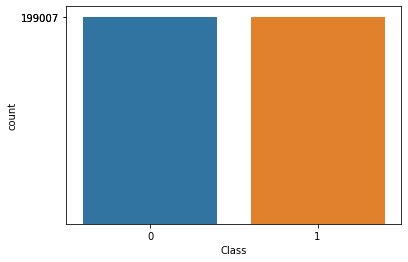

In [96]:
#visualize training dataset
plt.figure(figsize=(6,4))
sns.countplot(y_train1)
plt.yticks(y_train1.value_counts())
plt.show()

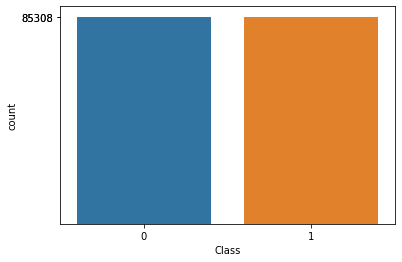

In [111]:
#visualize training dataset
plt.figure(figsize=(6,4))
sns.countplot(y_test1)
plt.yticks(y_test1.value_counts())
plt.show()

In [18]:
#create user defined function
def fit_model(model):
    model.fit(x_train1,y_train1)
    y_pred=model.predict(x_test1)
    print('Confusion Matrix ')
    print(confusion_matrix(y_test1,y_pred))
    print(classification_report(y_test1,y_pred))
    return model

1.Logistic Regression

In [19]:
#create object of LogisticRegression class
lr=LogisticRegression()
#fit model
lr=fit_model(lr) #calling user defined function

Confusion Matrix 
[[83712  1596]
 [ 8872 76436]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616



In [20]:
#Here Accuracy using Logistic Regression is good i.e.0.90 
#but apply other models to check for best accuracy

2.Decision Tree Classifier

-Gini index method

In [21]:
#create object of DecisionTreeClassifier class
dtc_gini=DecisionTreeClassifier() #by default it will take gini index
#fit model by calling user defined function
dtc_gini=fit_model(dtc_gini)

Confusion Matrix 
[[85272    36]
 [23883 61425]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     85308
           1       1.00      0.72      0.84     85308

    accuracy                           0.86    170616
   macro avg       0.89      0.86      0.86    170616
weighted avg       0.89      0.86      0.86    170616



In [22]:
dtc_gini.feature_importances_

array([1.39186690e-02, 7.21809794e-04, 1.97139651e-03, 1.48524043e-03,
       4.48476489e-02, 7.11090466e-03, 1.56894832e-03, 1.24743725e-02,
       1.07707953e-02, 4.96490494e-03, 3.80593494e-02, 1.91960455e-03,
       2.47741828e-02, 1.57194799e-02, 7.40995281e-01, 9.00775014e-05,
       1.31797171e-03, 6.41532667e-03, 1.97882871e-03, 1.06579904e-02,
       1.86347755e-02, 1.75776873e-03, 5.56873076e-03, 6.01168974e-03,
       1.20346923e-04, 4.63936245e-04, 5.91860410e-03, 4.85756395e-03,
       4.18878318e-03, 1.07150179e-02])

In [23]:
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [24]:
#here using Decision tree classifier gini index model gives accuracy as 0.72
#which is less than LogisticRegression model.
#reason behind less score is overfitting
#means model is overfit so to reduced the overfitting situation : - 
#Use pruning technique 
#There are 2 types of pruning techniques : -
#1. max_depth : inbulit parameter
#2. min_samples_leaf  : inbuilt parameter

Pruning Technique - max_depth 

In [25]:
#create object of class DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=6) #here keep maximum depth as 8
#to find max_depth value for good accuracy we use hit and trial method
#calling user defined object
dt1=fit_model(dt1)

Confusion Matrix 
[[81950  3358]
 [13320 71988]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     85308
           1       0.96      0.84      0.90     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616



In [26]:
dt1.feature_importances_

array([1.09866798e-02, 0.00000000e+00, 1.98543970e-03, 9.67975989e-05,
       4.74058190e-02, 7.58161347e-03, 0.00000000e+00, 7.17542403e-03,
       0.00000000e+00, 8.86304989e-04, 3.48320638e-02, 1.91916433e-03,
       2.63450776e-02, 1.04115373e-02, 7.94199185e-01, 0.00000000e+00,
       1.25255794e-03, 0.00000000e+00, 6.50910333e-04, 3.53966910e-03,
       1.94833732e-02, 0.00000000e+00, 5.35041633e-03, 5.33521765e-03,
       0.00000000e+00, 0.00000000e+00, 5.02012720e-03, 0.00000000e+00,
       4.09676365e-03, 1.14458576e-02])

In [27]:
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

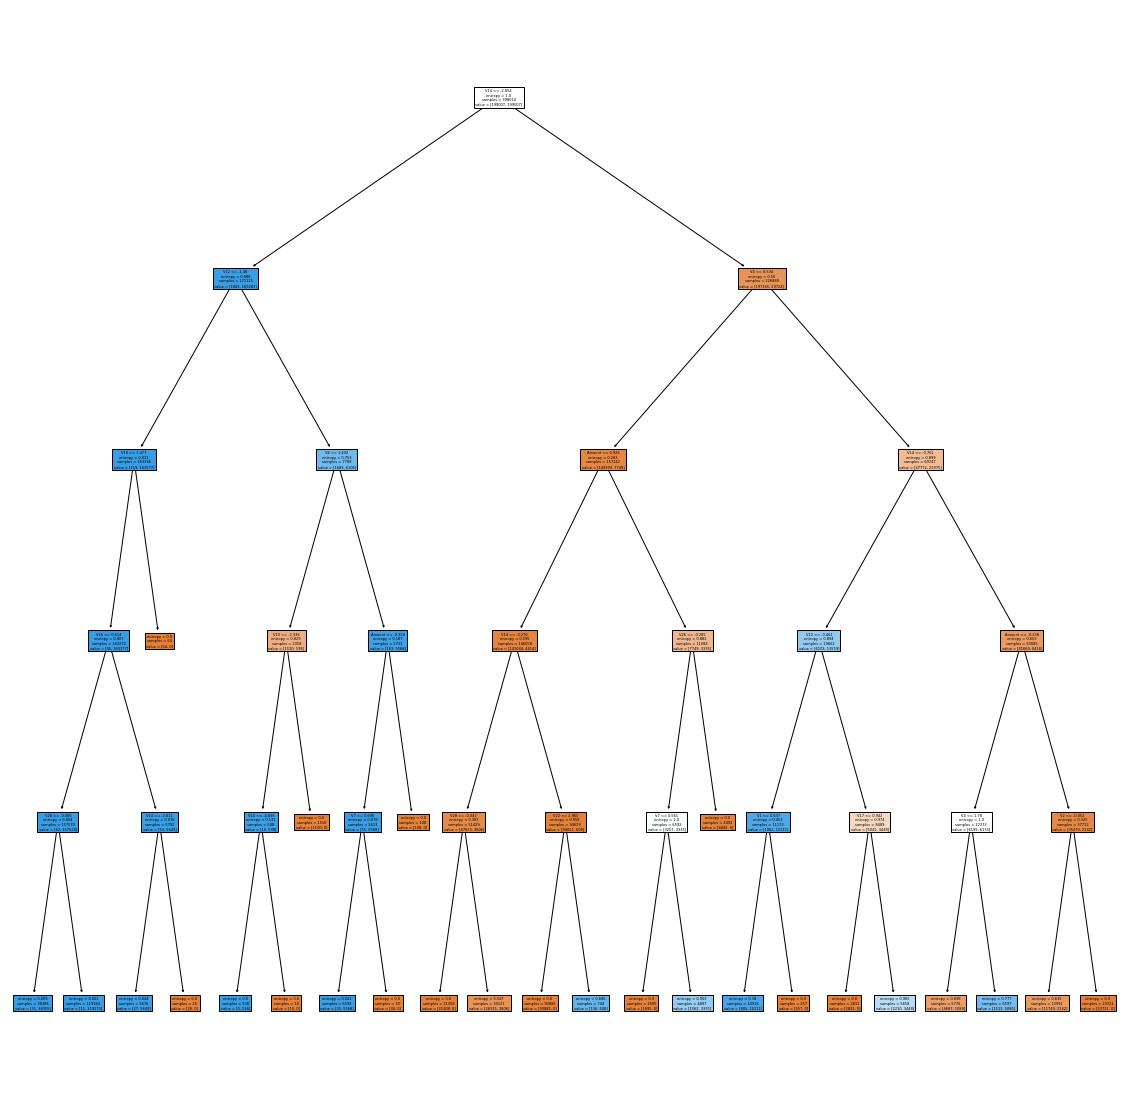

In [97]:
#DecisionTree diagram
#create the tree 
from sklearn import tree
features=columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [29]:
#max_depth=8 - 0.82
#max_depth=7 - 0.82
#max_depth=6 - 0.84
#max_depth=5 - 0.83
#so keep max_depth as 6
#using max_depth pruning technique on DecisionTreeClassifier accuracy is 0.84
#which is good but not more than LogisticRegression model
#now check for 2nd pruning technique

Pruning Technique - min_samples_leaf

In [102]:
dt2=DecisionTreeClassifier(min_samples_leaf=150)
#value should be minimum 45-50 or more than this
#calling user defined function
#fit model
dt2=fit_model(dt2)

Confusion Matrix 
[[84637   671]
 [13999 71309]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     85308
           1       0.99      0.84      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616



In [103]:
dt2.feature_importances_

array([1.40394555e-02, 8.21938994e-08, 0.00000000e+00, 2.00267174e-04,
       4.48722922e-02, 7.20878448e-03, 1.54176100e-03, 1.27164916e-02,
       1.14567377e-02, 4.15266409e-03, 3.86060795e-02, 9.13779926e-06,
       2.45364278e-02, 1.53561649e-02, 7.52387228e-01, 2.66648220e-08,
       7.26384927e-06, 5.45397354e-03, 1.84447697e-03, 1.07690086e-02,
       1.84119989e-02, 1.87364356e-03, 5.16160212e-03, 5.04183261e-03,
       4.79543231e-07, 1.71282306e-04, 4.81258100e-03, 4.50274672e-03,
       3.87854631e-03, 1.09869638e-02])

In [32]:
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

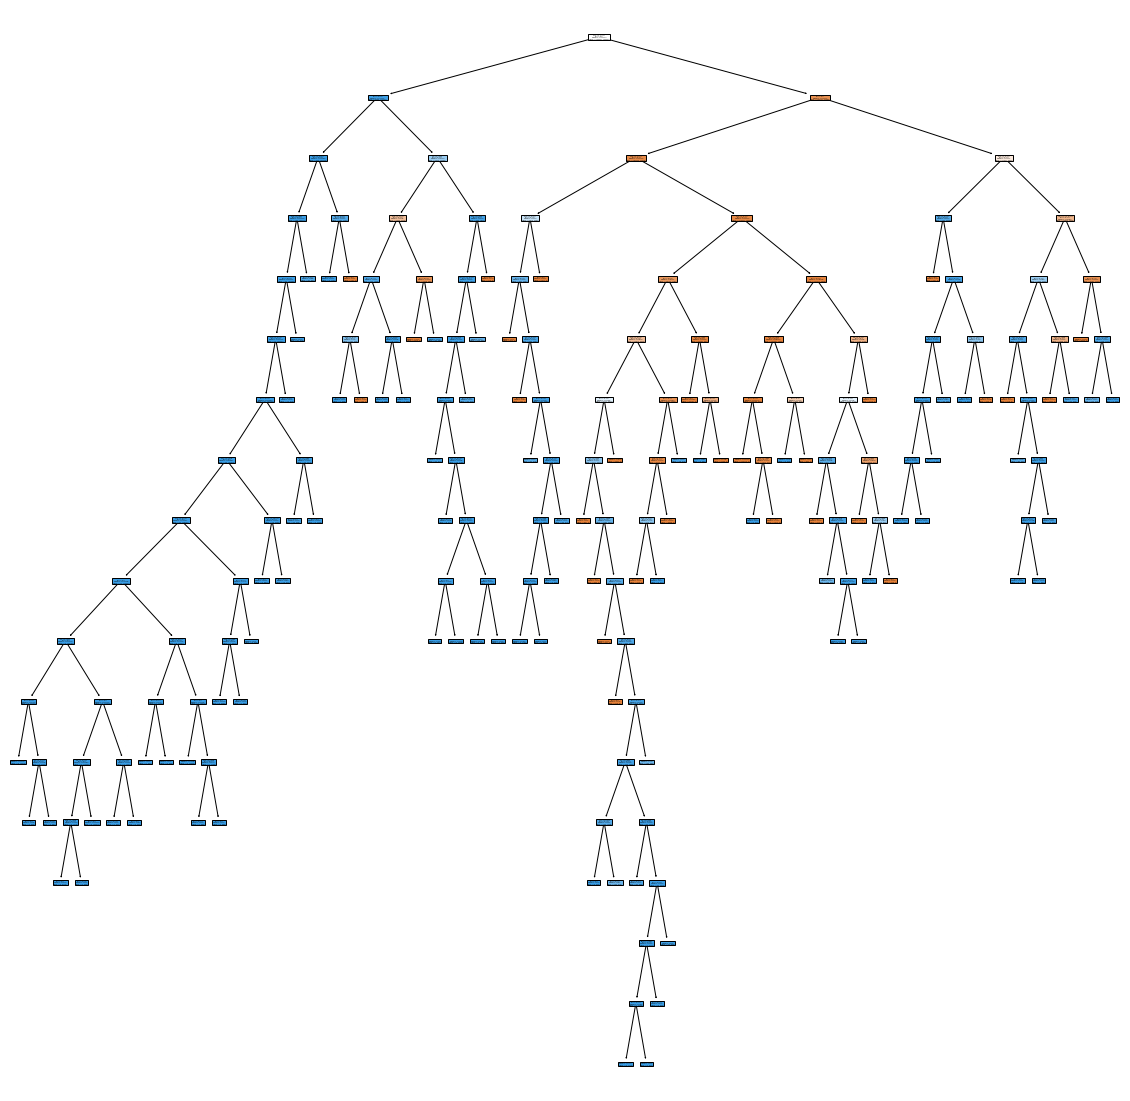

In [104]:
#DecisionTree diagram
#create the tree 
features=columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [33]:
#min_samples_leaf=50 - 0.82
#min_samples_leaf=100 - 0.83
#min_samples_leaf=150 - 0.84
#min_samples_leaf=200 - 0.84
#so keep min_samples_leaf as 150
#using min_samples_leaf pruning technique on
#DecisionTreeClassifier accuracy is 0.84
#which is good but not more than LogisticRegression model
#and there is not more difference on accuracy using different pruning technique
#on gini index method
#now use entropy method

-Entropy method

In [34]:
#create object of DecisionTreeClassifier class
dtc_entropy=DecisionTreeClassifier(criterion='entropy')
#fit model by calling user defined function
dtc_entropy=fit_model(dtc_entropy)

Confusion Matrix 
[[85276    32]
 [25998 59310]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     85308
           1       1.00      0.70      0.82     85308

    accuracy                           0.85    170616
   macro avg       0.88      0.85      0.84    170616
weighted avg       0.88      0.85      0.84    170616



In [35]:
dtc_entropy.feature_importances_

array([4.57157902e-03, 5.88350107e-03, 1.41997136e-02, 1.14552009e-02,
       7.20071634e-02, 7.34092953e-03, 8.16566498e-03, 6.25539063e-03,
       1.78656711e-02, 3.09300211e-04, 5.83755294e-03, 1.19557177e-02,
       2.91462246e-02, 1.72274457e-03, 6.86324450e-01, 3.27511043e-03,
       2.49119693e-03, 8.64417231e-03, 7.31538136e-03, 1.52490068e-03,
       2.81604516e-04, 2.21957595e-03, 1.22951494e-02, 7.69252072e-04,
       8.59441737e-03, 2.43075566e-04, 1.95218740e-02, 5.24911687e-04,
       1.17177540e-02, 3.75408195e-02])

In [36]:
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [37]:
#here using Decision tree classifier entropy method,
#model gives accuracy as 0.70
#which is less than LogisticRegression model.
#reason behind less score is overfitting
#means model is overfit so to reduced the overfitting situation : - 
#so again Use pruning technique 

Pruning Technique - max_depth

In [38]:
#create object of class DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=5,criterion='entropy') #here keep maximum depth as 8
#to find max_depth value for good accuracy we use hit and trial method
#calling user defined object
dt1=fit_model(dt1)

Confusion Matrix 
[[82637  2671]
 [11988 73320]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     85308
           1       0.96      0.86      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616



In [39]:
dt1.feature_importances_

array([0.00000000e+00, 2.63622913e-03, 9.72391082e-03, 0.00000000e+00,
       7.51975318e-02, 0.00000000e+00, 0.00000000e+00, 6.84906509e-03,
       0.00000000e+00, 0.00000000e+00, 6.59822930e-03, 0.00000000e+00,
       3.22947732e-02, 0.00000000e+00, 7.83383160e-01, 0.00000000e+00,
       4.73934626e-04, 8.07913640e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.37704947e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.25901514e-03, 0.00000000e+00,
       8.88554331e-03, 4.28489763e-02])

In [40]:
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

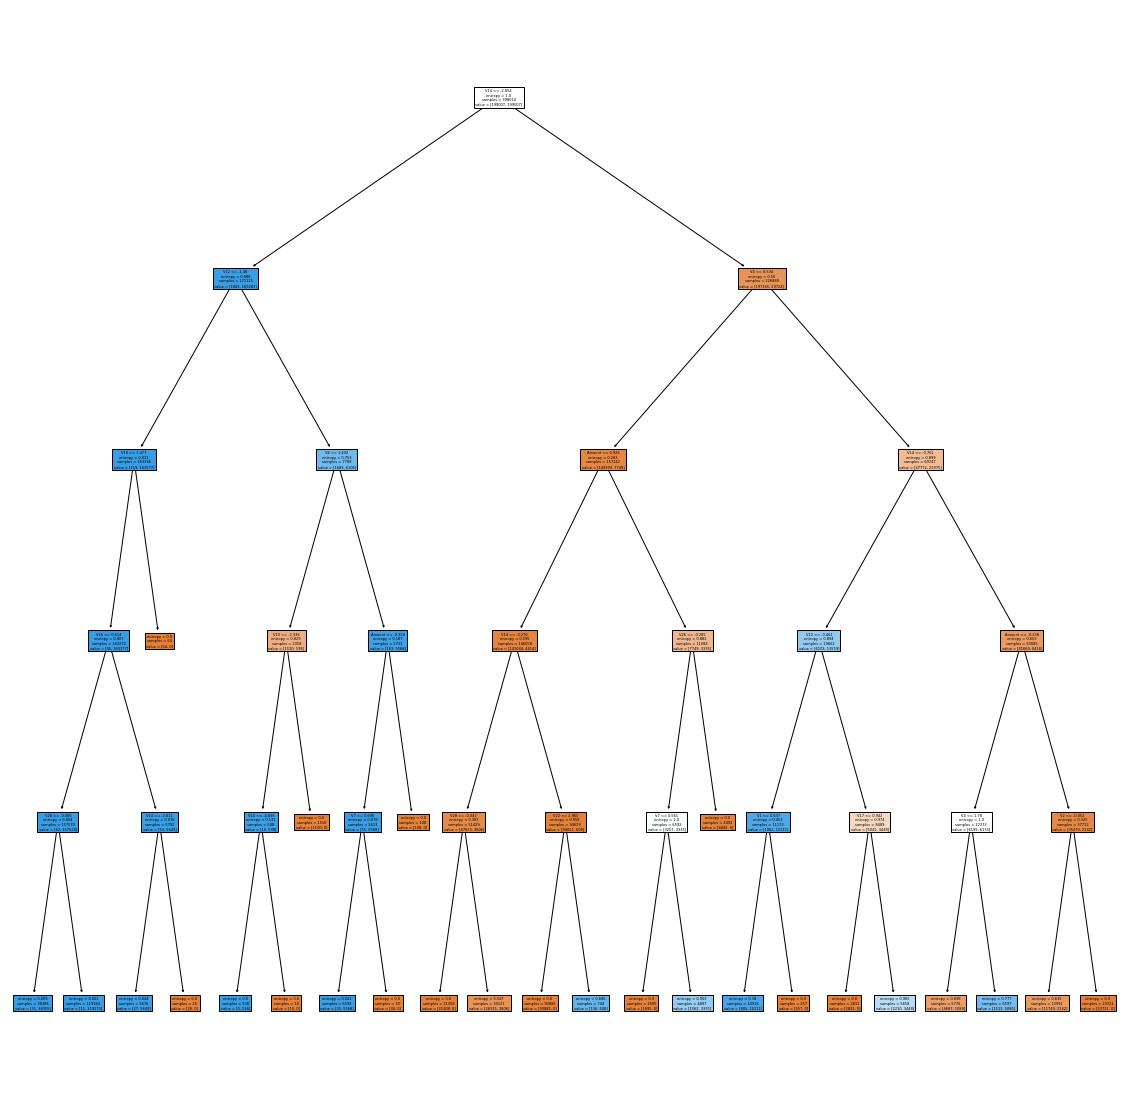

In [100]:
#DecisionTree diagram
#create the tree 
features=columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [41]:
#max_depth=8 - 0.75
#max_depth=7 - 0.81
#max_depth=6 - 0.84
#max_depth=5 - 0.86
#max_depth=4 - 0.82
#so keep max_depth as 5
#using max_depth pruning technique on DecisionTreeClassifier entropy method
#accuracy is 0.86
#which is good but not more than LogisticRegression model
#now check for 2nd pruning technique

Pruning Technique - min_samples_leaf

In [105]:
dt2=DecisionTreeClassifier(min_samples_leaf=150,criterion='entropy')
#value should be minimum 45-50 or more than this
#calling user defined function
#fit model
dt2=fit_model(dt2)

Confusion Matrix 
[[84700   608]
 [15253 70055]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     85308
           1       0.99      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616



In [107]:
dt2.feature_importances_

array([6.71674141e-03, 6.86381039e-03, 1.38741385e-02, 8.45574010e-03,
       7.23487352e-02, 6.75380976e-03, 7.01665053e-03, 5.53487629e-03,
       1.81534269e-02, 0.00000000e+00, 5.38183287e-03, 1.11758823e-02,
       2.92511252e-02, 1.46118169e-03, 6.95390528e-01, 3.11686439e-03,
       8.97221152e-04, 7.17637377e-03, 6.91878371e-03, 8.19480541e-06,
       1.56798655e-03, 5.64357399e-04, 1.29092096e-02, 4.84261562e-04,
       1.03945118e-02, 9.91572853e-05, 1.92301300e-02, 0.00000000e+00,
       1.09339762e-02, 3.73204930e-02])

In [44]:
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

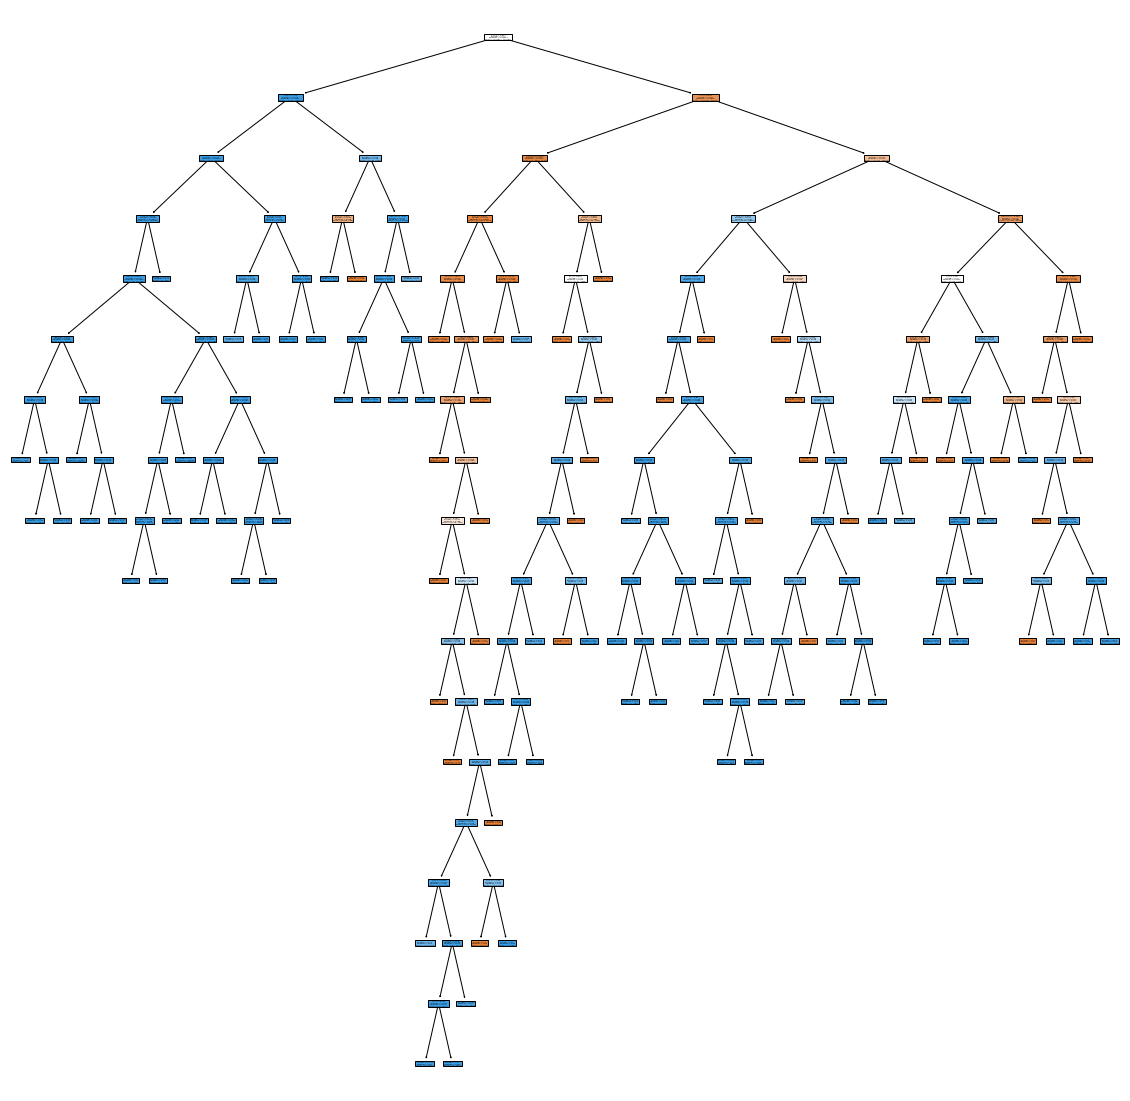

In [106]:
#DecisionTree diagram
#create the tree 
features=columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [45]:
#min_samples_leaf=50 - 0.80
#min_samples_leaf=150 - 0.82
#using min_samples_leaf pruning technique on DecisionTreeClassifier accuracy is 0.82
#which is good but not more than LogisticRegression model
#and there is not more difference on accuracy using different pruning technique
#on entropy method
#Now use support vector machine algorithmn

3.Support Vector Machine 

In [46]:
#There are different types of SVM : -
#1. Linear Separable data means Linear Kernal
#2.  Non -Linear data -
# 1. Polynomial Kernal function    2. radial basis kernel function

Linear Separable data(Linear Kernal)

In [47]:
#create object of class LinearSVC
svc=LinearSVC(random_state=1)#by default it take hard margin
#calling user defined function to fit model
svc=fit_model(svc)

Confusion Matrix 
[[83851  1457]
 [ 9502 75806]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.89      0.93     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616



In [48]:
#here accuracy is 0.89 which is good using SVM with hard margin
#but checking for better accuracy add error by using soft margin

In [49]:
#create object of class LinearSVC
svc_soft=LinearSVC(random_state=1,C=0.05)
#calling user defined function to fit model
svc_soft=fit_model(svc)

Confusion Matrix 
[[83851  1457]
 [ 9502 75806]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.89      0.93     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616



In [50]:
#C=0.05 - 0.88
#C=0.02 - 0.88
#C=0.09 - 0.88
#that means there is no outlier into the data
#so there is no need to add errors using soft margin
#because that will not affect accuracy.
#hence data is linearly separable

4.Ensembling Techniques

-Naive Aggregation Method

In [51]:
#selecting 3 models which gives good accuracy
#LogisticRegression,DecisionTreeClassifier_gini index,LinearSVC
#Creating objects of those models
lr=LogisticRegression()
dtc_gini=DecisionTreeClassifier(max_depth=6)
svc=LinearSVC(random_state=1)

In [52]:
#hard voting
#create a model list 
model_list=[("Logistic",lr),("Decision_tree_gini",dtc_gini),
            ("SupportVectormachine",svc)]
#create object of class VotingClassifier
vc1=VotingClassifier(estimators=model_list)
m=fit_model(vc1)

Confusion Matrix 
[[83932  1376]
 [ 9502 75806]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.89      0.93     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616



In [53]:
#using Naive aggregation method of hard voting ,getting accuracy as 0.89

-Bootstrapping

-Random Forest Classifier

In [54]:
#create object of class RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)
rfc=fit_model(rfc)

Confusion Matrix 
[[85300     8]
 [20295 65013]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     85308
           1       1.00      0.76      0.86     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616



In [55]:
#using RandomForestClassifier accuracy is 0.76
#which is less than LogisticRegression

-Bagging and pasting

In [70]:
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=2000,random_state=1)
bc=fit_model(bc)

Confusion Matrix 
[[83415  1893]
 [ 8219 77089]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616



In [59]:
#accuracy is 0.89 n_estimator=10 max_samples=1000
#accuracy is 0.90 n_estimator=10 max_samples=2000
#accuracy is 0.90 using BaggingClassifier

In [74]:
#pasting
bc_p=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=2000,random_state=1,bootstrap=False)
bc_p=fit_model(bc_p)

Confusion Matrix 
[[83404  1904]
 [ 8219 77089]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616



In [75]:
#accuracy is 0.89 n_estimator=10 max_samples=1000
#accuracy is 0.90 n_estimator=10 max_samples=2000
#accuracy is 0.90 using pasting
#here accuracy is more using bagging and pasting than Naive aggregation method
#and RandomForestCLassifier

In [76]:
#StackingClassifier
#create model list
model_list=[lr,dtc_gini,svc]
#use meta classifier select algorithm 
meta=LogisticRegression()
#create object of StackingClassifier
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)
#calling user defined function to fit model
sc=fit_model(sc)

Confusion Matrix 
[[81950  3358]
 [13320 71988]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     85308
           1       0.96      0.84      0.90     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616



In [77]:
#accuracy is 0.84 using StackingClassifier which is good
#but less than BaggingClassifier

-Boosting Techniques

-ADA boost

In [84]:
#create object of class AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=25)# n_estimators can be <=100
#AdaBoost create a decision stumps
#calling user defined function
ada=fit_model(ada)

Confusion Matrix 
[[83123  2185]
 [ 8252 77056]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     85308
           1       0.97      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616



In [85]:
#n_estimators=50 accuracy is 0.86
#n_estimators=75 accuracy is 0.86
#n_estimators=25 accuracy is 0.90

-Gradient Boosting

In [89]:
gbc=GradientBoostingClassifier(n_estimators=25)
gbc=fit_model(gbc)

Confusion Matrix 
[[84565   743]
 [10769 74539]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     85308
           1       0.99      0.87      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616



In [90]:
#n_estimators=50 accuracy is 0.87
#n_estimators=75 accuracy is 0.86
#n_estimators=25 accuracy is 0.87

-Extreme Gradient Boosting (XGB)

In [94]:
#create object of class XGBClassifier
xgb=XGBClassifier(n_estimators=25,reg_alpha=1)
xgb=fit_model(xgb)

[16:02:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix 
[[85290    18]
 [17709 67599]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.79      0.88     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.89    170616
weighted avg       0.91      0.90      0.89    170616



In [95]:
#accuracy is 0.79 n_estimators=25

Here,

Accuracy using different models,feature selection techniques and Ensembling techniques are as follows : -

Logistic Regression - 0.90 

Decision tree classifier (gini index) - 0.72

Decision tree classifier (gini index) max_depth pruning technique - 0.84

Decision tree classifier (gini index) min_samples_leaf pruning technique - 0.84

Decision tree classifier (Entropy) - 0.70

Decision tree classifier (Entropy) max_depth pruning technique - 0.86

Decision tree classifier (Entropy) min_samples_leaf pruning technique - 0.82

Support Vector Machine (Hard margin) - 0.89 

Support Vector Machine (Soft margin) - 0.88

Naive aggregation method (Hard voting) - 0.89

Random Forest Classifier - 0.76

Bootstraping - Bagging Classifier - 0.90

Bootstraping - Pasting - 0.90

Stacking Classifier - 0.84 

Ada Boost Classifier - 0.90 

Gradient Boosting Classifier - 0.87 

Extreme Gradient Boosting Classifier (XGBClassifier) - 0.79

In [108]:
#####################################################################

Conclusion : 
    
Ada Boost Classifier gives best accuracy as compare to others.

In [ ]:
#####################################################################